C:\Users\sanja\AppData\Local\Temp\ipykernel_3476\3696807462.py:15: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
C:\Users\sanja\AppData\Local\Temp\ipykernel_3476\3696807462.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\sanja\AppData\Local\Temp\ipykernel_3476\3696807462.py:20: FutureWarning: A value is


Dataset Summary:
              Age  Number of sexual partners  First sexual intercourse  \
count  858.000000                 858.000000                858.000000   
mean    26.820513                   2.511655                 16.995338   
std      8.497948                   1.644759                  2.791883   
min     13.000000                   1.000000                 10.000000   
25%     20.000000                   2.000000                 15.000000   
50%     25.000000                   2.000000                 17.000000   
75%     32.000000                   3.000000                 18.000000   
max     84.000000                  28.000000                 32.000000   

       Num of pregnancies      Smokes  Smokes (years)  Smokes (packs/year)  \
count          858.000000  858.000000      858.000000           858.000000   
mean             2.257576    0.143357        1.201241             0.446278   
std              1.400981    0.350641        4.060623             2.210351   
min

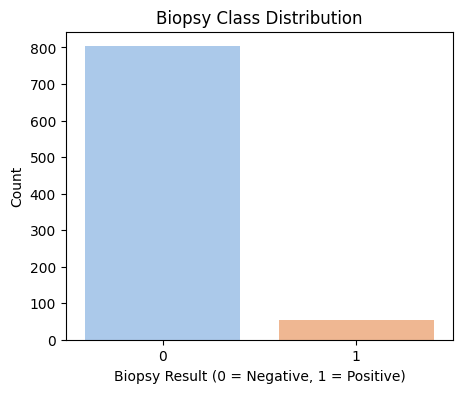

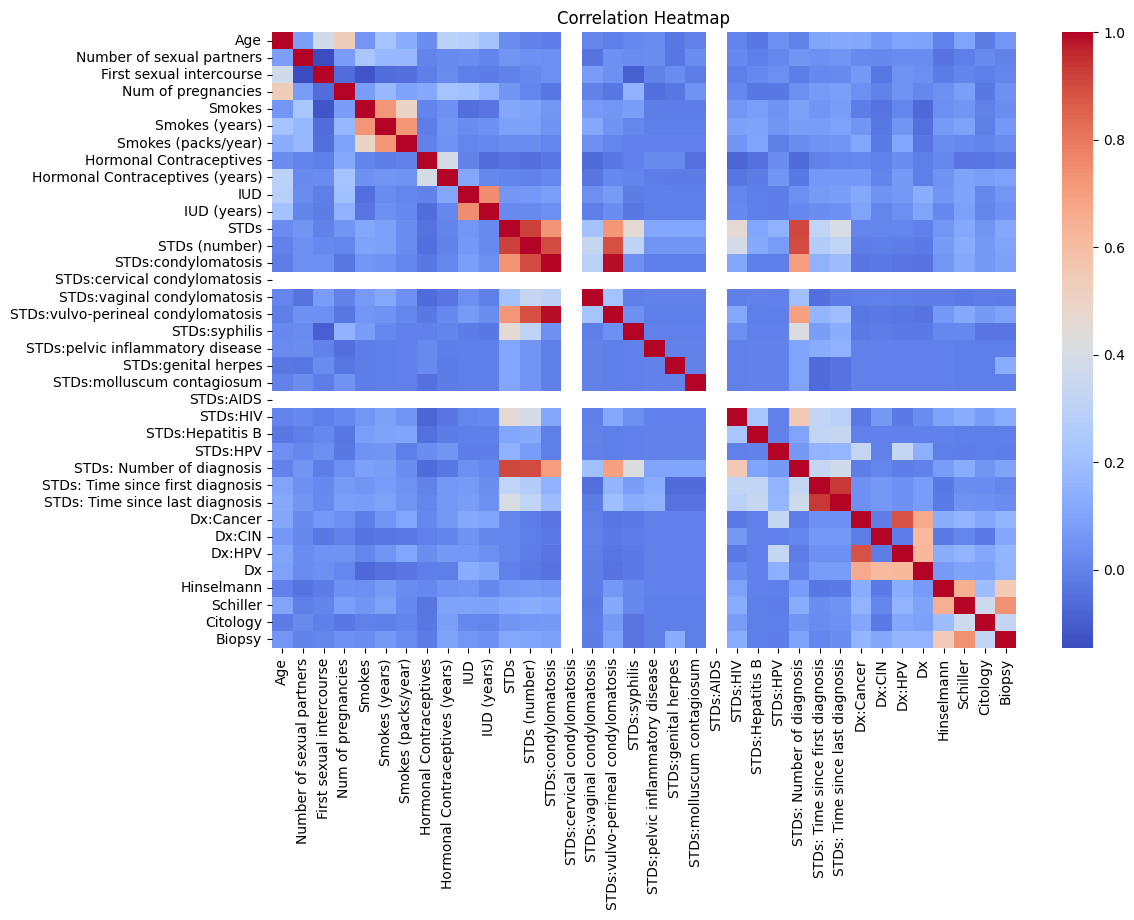


Mean values for positive cases:
 Age                                   28.636364
Number of sexual partners              2.509091
First sexual intercourse              17.072727
Num of pregnancies                     2.472727
Smokes                                 0.181818
Smokes (years)                         2.150309
Smokes (packs/year)                    0.652967
Hormonal Contraceptives                0.654545
Hormonal Contraceptives (years)        3.318000
IUD                                    0.163636
IUD (years)                            0.709091
STDs                                   0.218182
STDs (number)                          0.363636
STDs:condylomatosis                    0.127273
STDs:cervical condylomatosis           0.000000
STDs:vaginal condylomatosis            0.000000
STDs:vulvo-perineal condylomatosis     0.127273
STDs:syphilis                          0.000000
STDs:pelvic inflammatory disease       0.000000
STDs:genital herpes                    0.018182
STDs:m

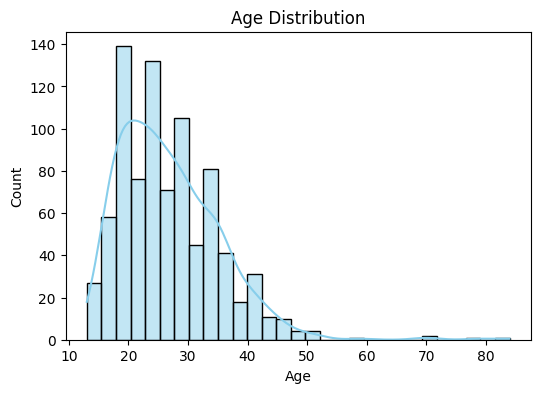

C:\Users\sanja\AppData\Local\Temp\ipykernel_3476\3696807462.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Biopsy', y='Smokes', data=df, palette="Set2")


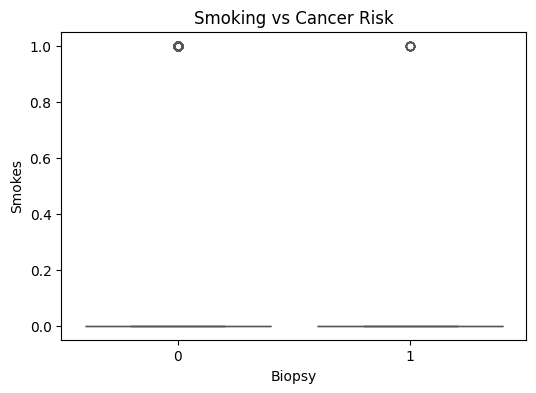

C:\Users\sanja\AppData\Local\Temp\ipykernel_3476\3696807462.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Biopsy', y='Num of pregnancies', data=df, palette="Set3")


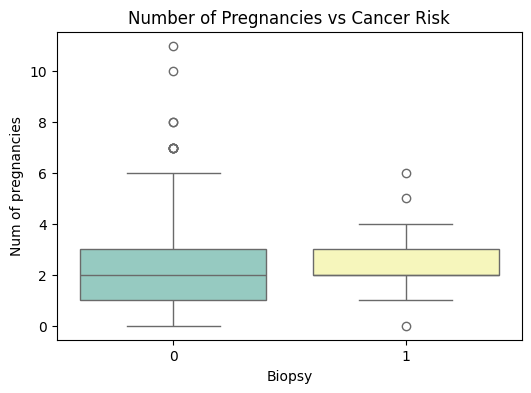

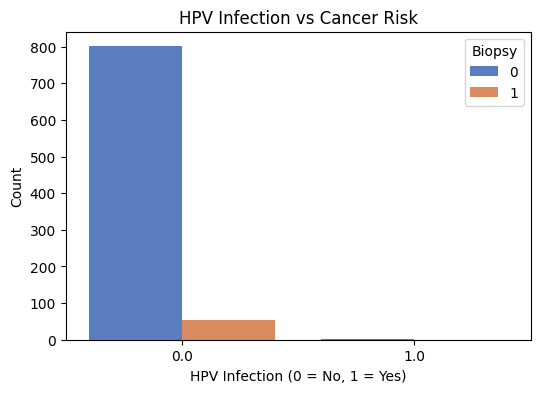

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load raw dataset (not encoded/scaled yet)
data_path = "C:/Users/sanja/3. Cervical_Cancer_Risk_Analysis/Cervical_Cancer_Risk_Analysis/data/raw/risk_factors_cervical_cancer.csv"
df = pd.read_csv(data_path)

# 1. Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# 2. Convert columns to numeric where possible
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# 3. Fill missing values
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

# 4. Dataset summary
print("\nDataset Summary:")
print(df.describe())

# 5. Class balance
plt.figure(figsize=(5,4))
sns.countplot(x='Biopsy', data=df, palette="pastel")
plt.title("Biopsy Class Distribution")
plt.xlabel("Biopsy Result (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()

# 6. Correlation heatmap
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 7. Compare mean values for positive vs negative biopsy cases
positive = df[df['Biopsy'] == 1]
negative = df[df['Biopsy'] == 0]
print("\nMean values for positive cases:\n", positive.mean(numeric_only=True))
print("\nMean values for negative cases:\n", negative.mean(numeric_only=True))

# 8. Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title("Age Distribution")
plt.show()

# 9. Smoking history vs cancer risk
plt.figure(figsize=(6,4))
sns.boxplot(x='Biopsy', y='Smokes', data=df, palette="Set2")
plt.title("Smoking vs Cancer Risk")
plt.show()

# 10. Number of pregnancies vs cancer risk
plt.figure(figsize=(6,4))
sns.boxplot(x='Biopsy', y='Num of pregnancies', data=df, palette="Set3")
plt.title("Number of Pregnancies vs Cancer Risk")
plt.show()

# 11. HPV infection vs cancer risk
plt.figure(figsize=(6,4))
sns.countplot(x='STDs:HPV', hue='Biopsy', data=df, palette="muted")
plt.title("HPV Infection vs Cancer Risk")
plt.xlabel("HPV Infection (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Paths
base_dir = "C:/Users/sanja/3. Cervical_Cancer_Risk_Analysis/Cervical_Cancer_Risk_Analysis"
data_path = f"{base_dir}/data/raw/risk_factors_cervical_cancer.csv"
figures_dir = f"{base_dir}/results/figures"
tables_dir = f"{base_dir}/results/tables"

# Create results folders if they don't exist
os.makedirs(figures_dir, exist_ok=True)
os.makedirs(tables_dir, exist_ok=True)

# Load dataset
df = pd.read_csv(data_path)

# 1. Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# 2. Convert columns to numeric where possible
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# 3. Fill missing values
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

# 4. Save dataset summary
summary = df.describe()
summary.to_csv(f"{tables_dir}/dataset_summary.csv")

# 5. Class balance
plt.figure(figsize=(5,4))
sns.countplot(x='Biopsy', data=df, palette="pastel")
plt.title("Biopsy Class Distribution")
plt.xlabel("Biopsy Result (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.savefig(f"{figures_dir}/biopsy_class_distribution.png", dpi=300, bbox_inches="tight")
plt.close()

# 6. Correlation heatmap
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig(f"{figures_dir}/correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.close()

# 7. Save mean values for positive vs negative cases
positive = df[df['Biopsy'] == 1]
negative = df[df['Biopsy'] == 0]
positive_mean = positive.mean(numeric_only=True)
negative_mean = negative.mean(numeric_only=True)

positive_mean.to_csv(f"{tables_dir}/positive_cases_mean.csv")
negative_mean.to_csv(f"{tables_dir}/negative_cases_mean.csv")

# 8. Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title("Age Distribution")
plt.savefig(f"{figures_dir}/age_distribution.png", dpi=300, bbox_inches="tight")
plt.close()

# 9. Smoking vs cancer risk
plt.figure(figsize=(6,4))
sns.boxplot(x='Biopsy', y='Smokes', data=df, palette="Set2")
plt.title("Smoking vs Cancer Risk")
plt.savefig(f"{figures_dir}/smoking_vs_cancer.png", dpi=300, bbox_inches="tight")
plt.close()

# 10. Pregnancies vs cancer risk
plt.figure(figsize=(6,4))
sns.boxplot(x='Biopsy', y='Num of pregnancies', data=df, palette="Set3")
plt.title("Number of Pregnancies vs Cancer Risk")
plt.savefig(f"{figures_dir}/pregnancies_vs_cancer.png", dpi=300, bbox_inches="tight")
plt.close()

# 11. HPV infection vs cancer risk
plt.figure(figsize=(6,4))
sns.countplot(x='STDs:HPV', hue='Biopsy', data=df, palette="muted")
plt.title("HPV Infection vs Cancer Risk")
plt.xlabel("HPV Infection (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.savefig(f"{figures_dir}/hpv_vs_cancer.png", dpi=300, bbox_inches="tight")
plt.close()

print("EDA results and figures saved successfully.")


C:\Users\sanja\AppData\Local\Temp\ipykernel_3476\762166368.py:25: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
C:\Users\sanja\AppData\Local\Temp\ipykernel_3476\762166368.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\sanja\AppData\Local\Temp\ipykernel_3476\762166368.py:30: FutureWarning: A value is tr

EDA results and figures saved successfully.
